# Data Wrangling
* read hdf5 files into training and testing sets
* explored images in training set
* created dataframe from training set, confirmed no missing values
* Plot training set labels to visualize data distribution - may need to add or transform some images for additional data
* Plot test set labels to see if data distribution is similar to training set

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import h5py

# Input data files are available in the read-only "../input/" directory


In [2]:
#creating file paths for hdf5 files
train_path = '../input/food41/food_c101_n1000_r384x384x3.h5'
test_path = '../input/food41/food_test_c101_n1000_r128x128x3.h5'

In [3]:
f = h5py.File(train_path, "r")
f.keys()

<KeysViewHDF5 ['category', 'category_names', 'images']>

In [4]:
train_images = f['images'][...]
train_category = f['category'][...]
train_category_names = f['category_names'][...]
f.close()

In [5]:
print('Shape of train_category_names: ', train_category_names.shape)
print('Shape of train_category: ', train_category.shape)
print('Shape of train_images: ', train_images.shape)

Shape of train_category_names:  (101,)
Shape of train_category:  (1000, 101)
Shape of train_images:  (1000, 384, 384, 3)


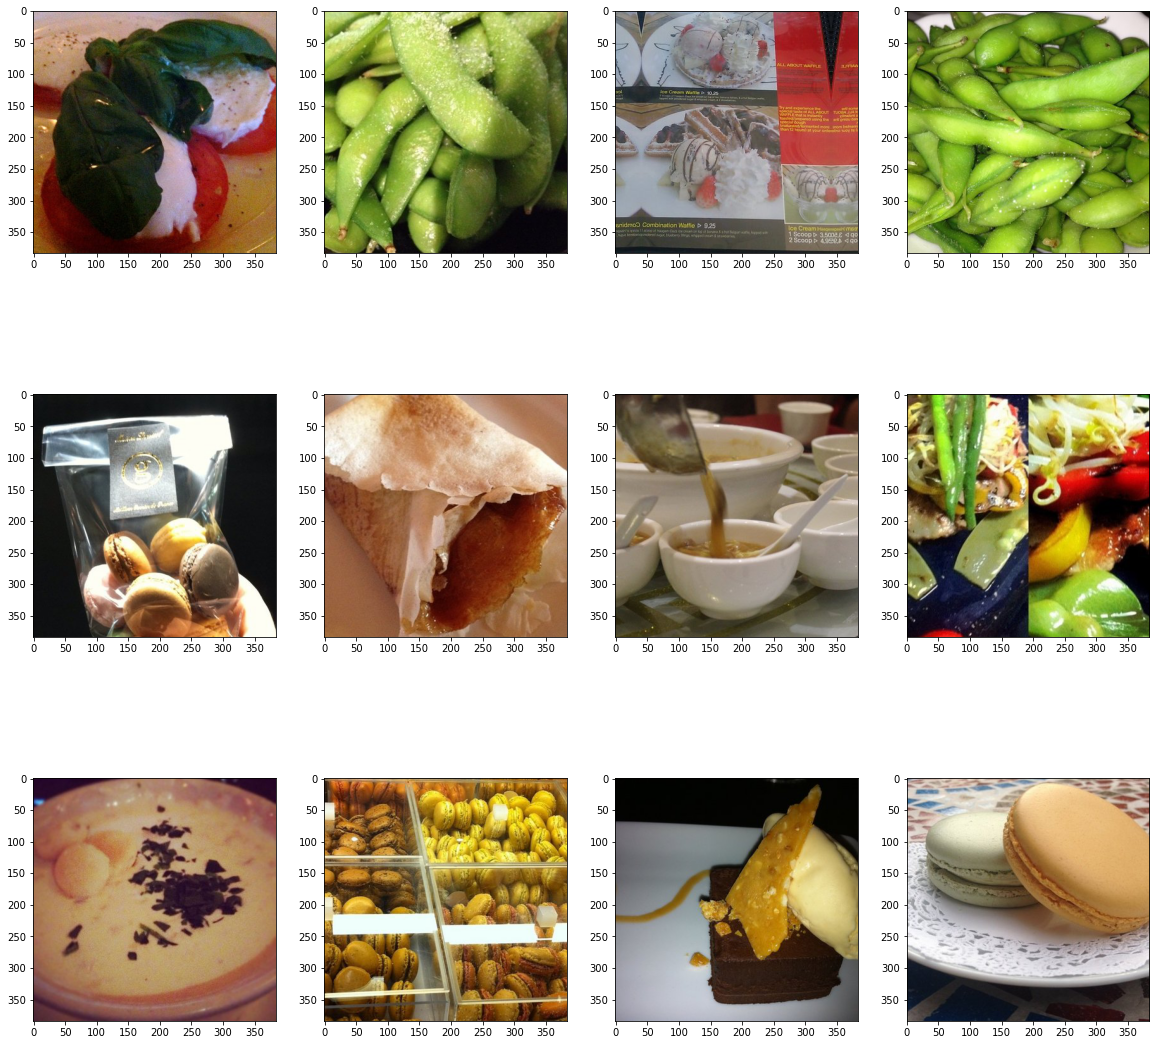

In [6]:
#plotting the first 12 images in the training dataset 

plt.subplots(3,4,figsize = (20,20))

for i in range(12):
    img_np = train_images[i]
    plt.subplot(3,4,1+i)
    plt.imshow(img_np)
plt.show()

## Exploring Training Data 
Now that we have succesfully loaded the training data, and confirmed that the images are displaying correctly, let's take a look at the training data set. Since the 'category' dataset is a matrix of booleans (think of what you'd get after doing one-hot-enconding on categories) we'll need to build a dataframe with the accourate labels and counts for each class. 

We'll start with building a dataframe with the label names, identifing which label is true for that row, and then creating a new dataframe with the counts. 

In [7]:
#this is just a list of the class types
df_train_category_names = pd.DataFrame(train_category_names, columns = ['label'])


In [8]:
df_train_category_names.head()

#why do we have the letter b in front of everything. How do we remove the 'byte' association, is it neccessary to remove

,label
0,b'apple_pie'
1,b'baby_back_ribs'
2,b'baklava'
3,b'beef_carpaccio'
4,b'beef_tartare'


In [9]:
df_train_category = pd.DataFrame(train_category)

In [10]:
#this actually gives us details into which class each image is 
df_train_category.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df_train_category.columns = train_category_names

In [12]:
df_train_category.head()

,b'apple_pie',b'baby_back_ribs',b'baklava',b'beef_carpaccio',b'beef_tartare',b'beet_salad',b'beignets',b'bibimbap',b'bread_pudding',b'breakfast_burrito',...,b'spaghetti_carbonara',b'spring_rolls',b'steak',b'strawberry_shortcake',b'sushi',b'tacos',b'takoyaki',b'tiramisu',b'tuna_tartare',b'waffles'
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
df_train_category.dtypes

b'apple_pie'         bool
b'baby_back_ribs'    bool
b'baklava'           bool
b'beef_carpaccio'    bool
b'beef_tartare'      bool
                     ... 
b'tacos'             bool
b'takoyaki'          bool
b'tiramisu'          bool
b'tuna_tartare'      bool
b'waffles'           bool
Length: 101, dtype: object

In [14]:
#created a new column that shows which category each row belongs to
df_train_category['food'] = df_train_category.idxmax(True)

In [15]:
df_train_category.head()

,b'apple_pie',b'baby_back_ribs',b'baklava',b'beef_carpaccio',b'beef_tartare',b'beet_salad',b'beignets',b'bibimbap',b'bread_pudding',b'breakfast_burrito',...,b'spring_rolls',b'steak',b'strawberry_shortcake',b'sushi',b'tacos',b'takoyaki',b'tiramisu',b'tuna_tartare',b'waffles',food
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,b'caprese_salad'
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,b'edamame'
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,b'waffles'
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,b'edamame'
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,b'macarons'


In [16]:
train_df = df_train_category[['food']]
train_df.head()

,food
0,b'caprese_salad'
1,b'edamame'
2,b'waffles'
3,b'edamame'
4,b'macarons'


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   food    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [18]:
value_counts = train_df.value_counts()
train_df = pd.DataFrame(value_counts).reset_index()
train_df.columns = ['food', 'counts']
train_df.head()

,food,counts
0,b'sashimi',19
1,b'sushi',17
2,b'cheese_plate',16
3,b'deviled_eggs',15
4,b'steak',15


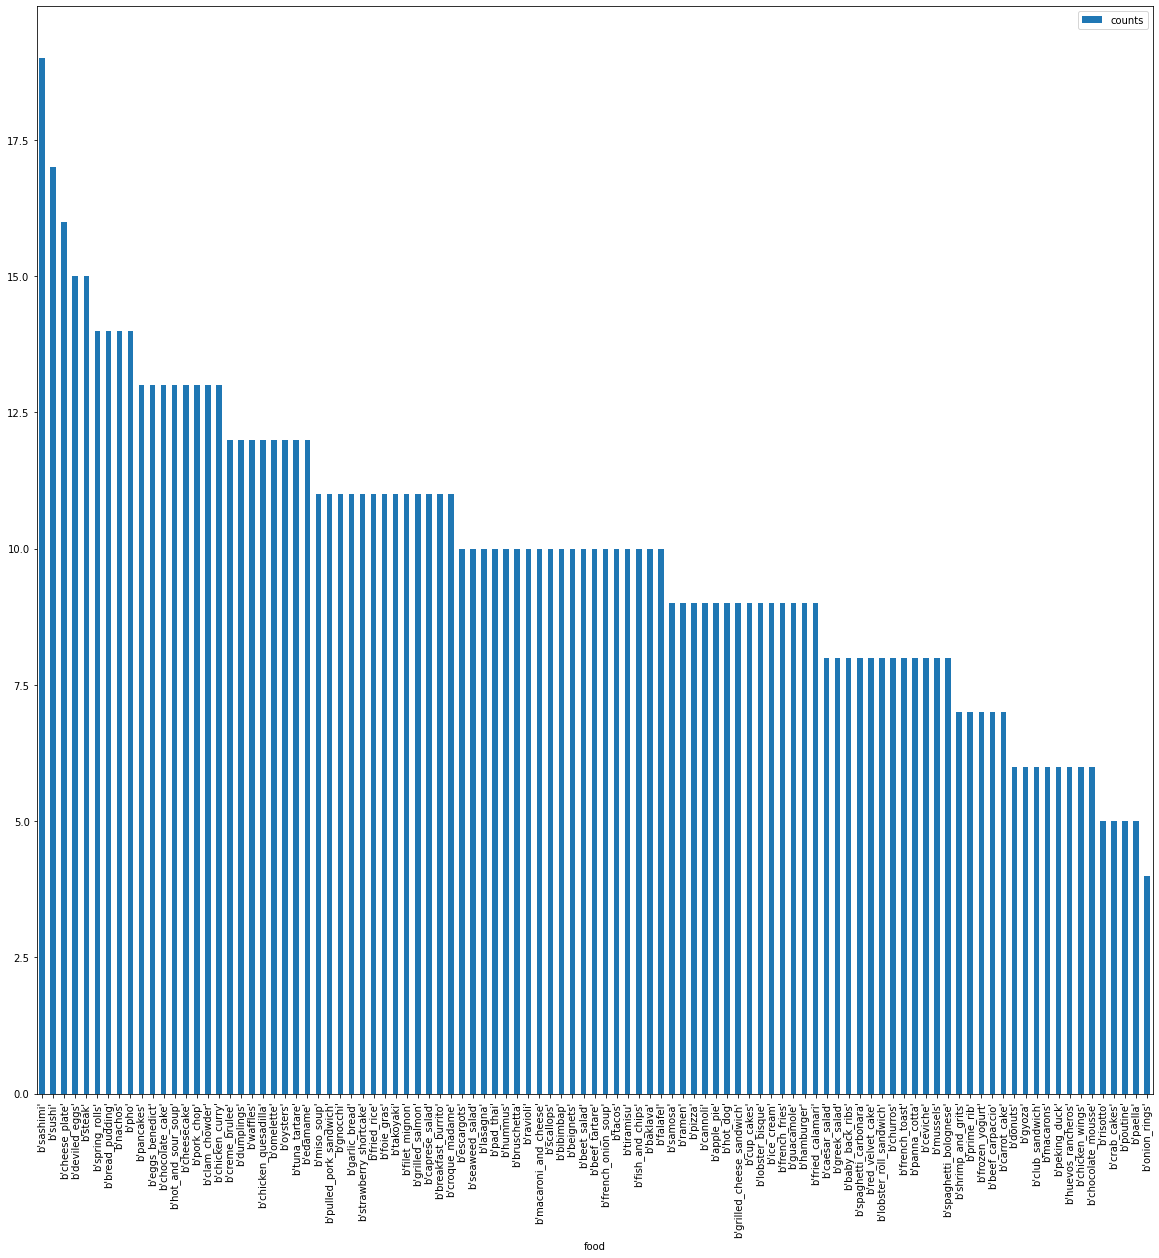

In [19]:
train_df.plot.bar(x = 'food', y = 'counts', figsize = (20,20))
plt.title = 'Food Class Counts in Training Set'
plt.show()

In [20]:
f = h5py.File(test_path, "r")
f.keys()
test_images = f['images'][...]
test_category = f['category'][...]
test_category_names = f['category_names'][...]
f.close()

In [21]:
print('Shape of test_category_names: ', test_category_names.shape)
print('Shape of test_category: ', test_category.shape)
print('Shape of test_images: ', test_images.shape)

Shape of test_category_names:  (101,)
Shape of test_category:  (1000, 101)
Shape of test_images:  (1000, 128, 128, 3)


## Test Data Distribution 

Usually we don't want to touch the test data at all, but we do want to see if the distribution is similar enough to the training data. 

In [22]:
df_test_category_names = pd.DataFrame(test_category_names, columns = ['label'])
df_test = pd.DataFrame(test_category, columns = df_test_category_names['label'])

In [25]:
df_test['food'] = df_test.idxmax(True)

In [26]:
df_test.head()

label,b'apple_pie',b'baby_back_ribs',b'baklava',b'beef_carpaccio',b'beef_tartare',b'beet_salad',b'beignets',b'bibimbap',b'bread_pudding',b'breakfast_burrito',...,b'spring_rolls',b'steak',b'strawberry_shortcake',b'sushi',b'tacos',b'takoyaki',b'tiramisu',b'tuna_tartare',b'waffles',food
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,b'strawberry_shortcake'
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,b'nachos'
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,b'foie_gras'
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,b'cannoli'
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,b'peking_duck'


In [27]:
df_test = df_test[['food']]
value_counts = df_test.value_counts()
test_df = pd.DataFrame(value_counts).reset_index()
test_df.columns = ['food', 'counts']
test_df.head()

,food,counts
0,b'beet_salad',20
1,b'tiramisu',19
2,b'pork_chop',16
3,b'shrimp_and_grits',16
4,b'panna_cotta',15


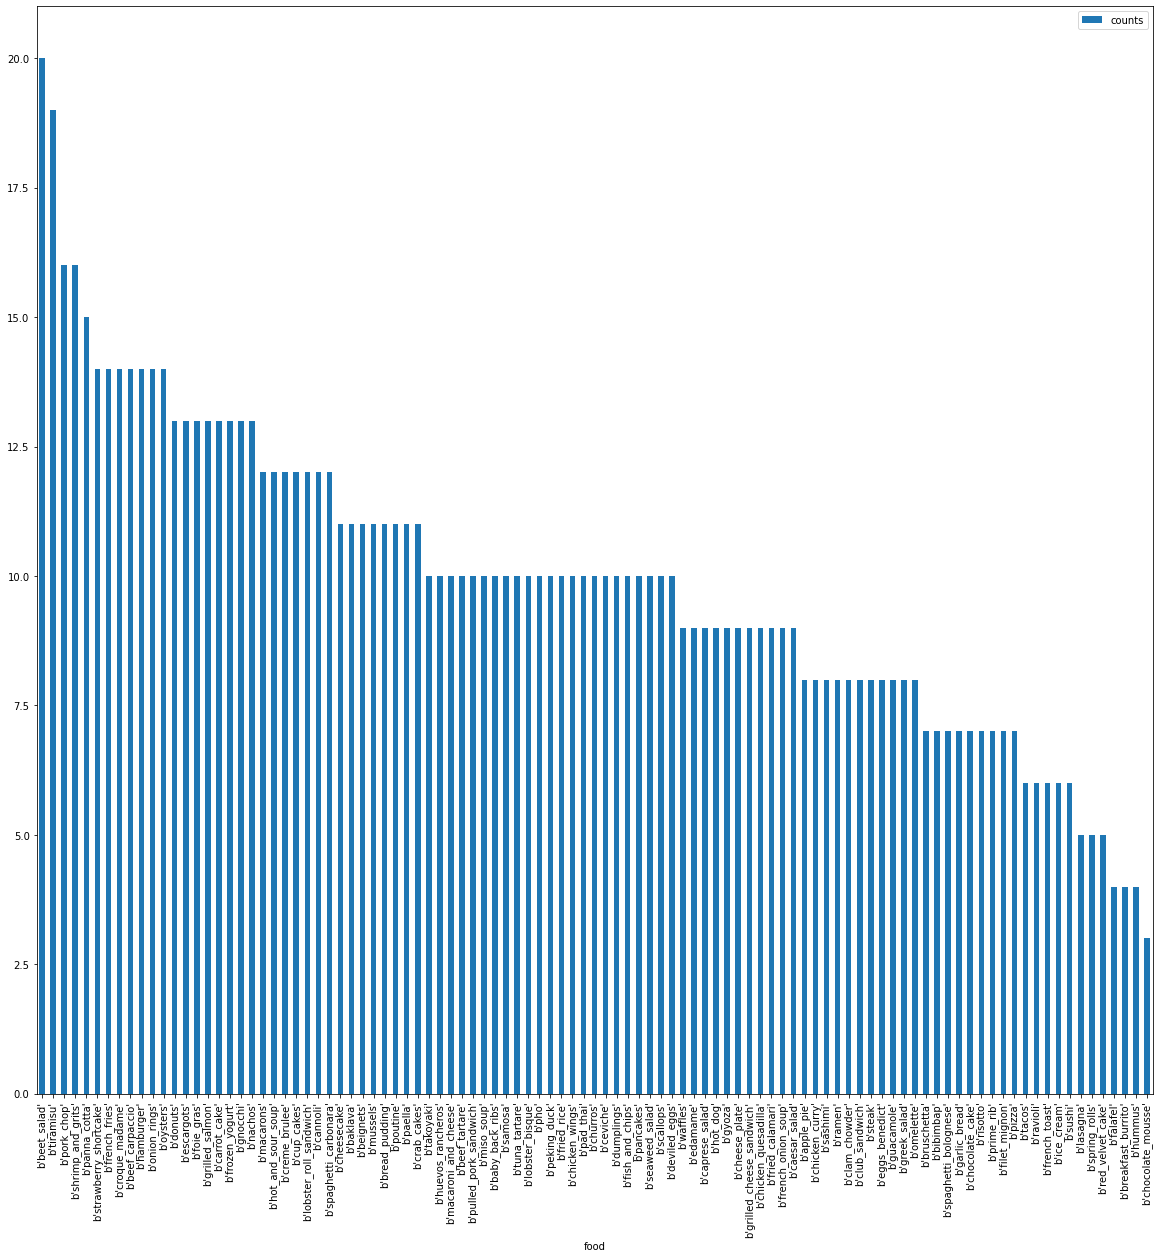

In [28]:
test_df.plot.bar(x = 'food', y = 'counts', figsize = (20,20))
plt.title = 'Food Class Counts in Testing Set'
plt.show()